In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import svm
import pandas as pd
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import numpy as np
files=glob.glob('pre_processed_training/*.csv')
total_training_data=pd.DataFrame([])
for f in tqdm(files):
    total_training_data=pd.concat([total_training_data,pd.read_csv(f)],axis=0)
total_training_data=total_training_data.sort_values(['Subject','Session','time_stamp'])
total_training_data["time_stamp"]=pd.to_datetime(total_training_data["time_stamp"]).round('us')
total_training_data=total_training_data[['Subject','Session','time_stamp','measurements','labels']].reset_index(drop=True)
total_training_data['measurements']=total_training_data['measurements'].apply(lambda x: np.array(literal_eval(x)))
#total_training_data=total_training_data.set_index('time_stamp').asfreq('0.025S')
#total_training_data=total_training_data.set_index(['Subject','Session','time_stamp'])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.86it/s]


In [2]:
from yellowbrick.model_selection import learning_curve

In [8]:
from sklearn.metrics import RocCurveDisplay

In [3]:
X_total=np.vstack(total_training_data.measurements)
Y_total=np.vstack(total_training_data.labels)
Y_total=Y_total.reshape((len(Y_total)))

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X_total, Y_total, test_size=0.2)

RandomForestClassifier(n_jobs=-1)

In [14]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_train= label_binarizer.transform(y_train)
y_onehot_test = label_binarizer.transform(y_val)
y_onehot_test.shape  # (n_samples, n_classes)

(268330, 4)

In [15]:
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
rf.fit(X_train, y_onehot_train)

RandomForestClassifier(n_jobs=-1)

In [17]:
y_pred=rf.predict(X_val)

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       ...,
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1]])

In [21]:
rf.decision_path(X_val)

(<268330x32302214 sparse matrix of type '<class 'numpy.int64'>'
 	with 686933920 stored elements in Compressed Sparse Row format>,
 array([       0,   323039,   645648,   968371,  1291456,  1613757,
         1935404,  2259949,  2583876,  2905493,  3228862,  3551621,
         3873346,  4196425,  4520050,  4842343,  5165168,  5486879,
         5809326,  6132253,  6453350,  6777797,  7100140,  7425211,
         7747506,  8071131,  8395142,  8719235,  9042424,  9365097,
         9687452, 10009261, 10331452, 10654697, 10978144, 11301375,
        11623738, 11946397, 12269810, 12592687, 12916198, 13239325,
        13562074, 13885585, 14208744, 14532363, 14854624, 15177685,
        15500574, 15825139, 16148008, 16470701, 16794520, 17117131,
        17440218, 17764119, 18085716, 18409861, 18732682, 19055053,
        19378978, 19701001, 20024340, 20348317, 20670662, 20992411,
        21314418, 21638595, 21961032, 22284283, 22606098, 22928797,
        23253092, 23576361, 23899084, 24221917, 24544

In [ ]:
X_train.shape

(1073316, 6)

In [27]:
feature_names = ['acc-x','acc-y','acc-z','gyro-x','gyro-y','gyro-z']

In [28]:
import time
import numpy as np

start_time = time.time()
importances = rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 3.539 seconds


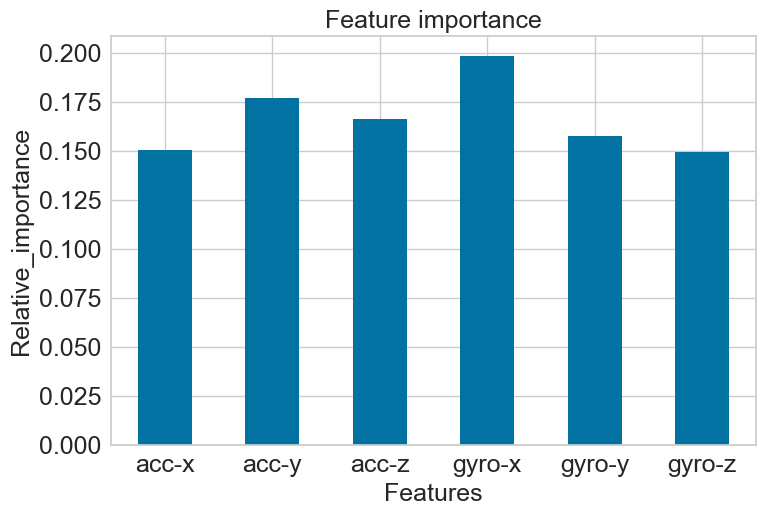

In [54]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importance")
ax.set_ylabel("Relative_importance")
ax.set_xlabel("Features")
plt.xticks(rotation='horizontal')
SMALL_SIZE=18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=0.1)    # fontsize of the tick labels
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title


fig.tight_layout()

In [ ]:
X_val,y_onehot_test

In [55]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    rf, X_val, y_onehot_test, n_repeats=10, random_state=42, n_jobs=-1
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 247.244 seconds


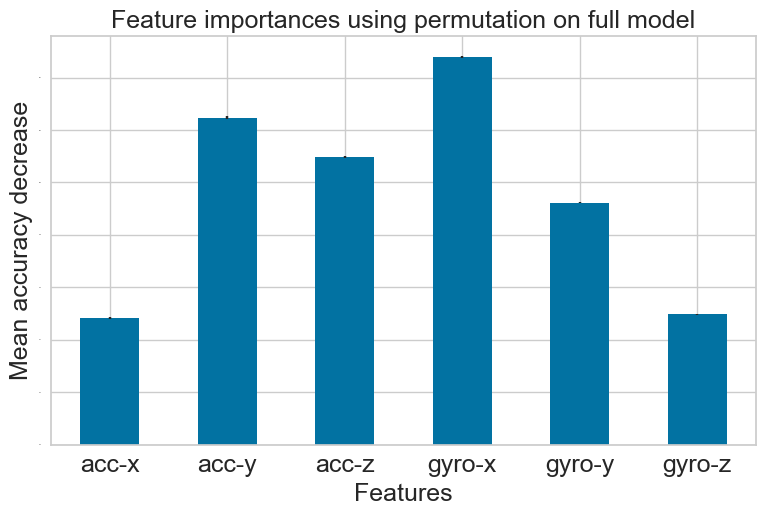

In [56]:


fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
ax.set_xlabel("Features")
plt.xticks(rotation='horizontal')
SMALL_SIZE=18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=0.1)    # fontsize of the tick labels
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title


fig.tight_layout()

In [57]:
from sklearn.metrics import roc_auc_score

In [58]:
roc_auc_score(y_onehot_test, y_pred, multi_class='ovr')

0.6519048670630883

In [73]:
cls_name=['Solid Ground (0)','Downstairs (1)','Upstairs (2)','Grass (3)']

In [84]:
fig, ax = plt.subplots(1, len(cls_name))
for class_id in range(len(cls_name)):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred[:, class_id],
        name=f"{cls_name[class_id]}",
        color="darkorange",
    )
    ax[class_id].plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    ax[class_id].axis("square")
    #ax[class_id].xlabel("False Positive Rate")
    #ax[class_id].ylabel("True Positive Rate")
    ax[class_id].set_title(f"One-vs-Rest ROC curves:\n {cls_name[class_id]}")
    ax[class_id].legend(loc='center', bbox_to_anchor=(1.2, 0.5))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

TypeError: Axes.set_title() missing 1 required positional argument: 'label'

In [ ]:
test_files=glob.glob('TestData/*.csv')

In [ ]:
Subject_list= [f.split('_')[1] for f in test_files]
Session_list= [f.split('_')[2] for f in test_files]
x_sensor_dat=pd.DataFrame([])
y_sensor_dat=pd.DataFrame([])
x_time_dat=[]
for sub,sess in zip(Subject_list,Session_list):
    #x_sensor_dat=pd.DataFrame(x_sensor_dat.append(pd.read_csv(f"TrainingData/subject_{sub}_{sess}__x.csv",header=None)))
    
    x_sensor_dat=pd.concat([pd.read_csv(f"TestData/subject_{sub}_{sess}__x.csv",header=None),pd.read_csv(f"TestData/subject_{sub}_{sess}__x_time.csv",header=None).rename(columns={0:'time_stamp'})],axis=1)

    x_sensor_dat['measurements']=x_sensor_dat.apply(lambda x: [x[0],x[1],x[2],x[3],x[4],x[5]],axis=1)
    x_sensor_dat=x_sensor_dat[['time_stamp','measurements']]
    x_sensor_dat["time_stamp"]=pd.to_datetime(x_sensor_dat["time_stamp"],unit='s').round('us')
    #x_sensor_dat=x_sensor_dat.set_index('time_stamp').asfreq('0.025S')
    x_sensor_dat['Subject']=int(sub)
    x_sensor_dat['Session']=int(sess)
    #x_sensor_dat=x_sensor_dat.set_index('time_stamp').asfreq('0.025S')

In [ ]:
X_test=np.vstack(x_sensor_dat.measurements)

In [ ]:
test_pred = rf.predict(X_test)
#accuracy = accuracy_score(y_val, y_pred)

In [ ]:
test_pred

In [ ]:
y_pred = rf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

In [ ]:
x_sensor_dat['test_pred']=list(test_pred)

In [ ]:
x_sensor_dat["time_stamp"]=pd.to_datetime(x_sensor_dat["time_stamp"],unit='s').round('us')
x_sensor_dat=x_sensor_dat.set_index('time_stamp').asfreq('0.01S', method='bfill')

In [ ]:
p=x_sensor_dat.reset_index(drop=False)

In [ ]:
p

In [ ]:
Subject_list= [f.split('_')[1] for f in test_files]
Session_list= [f.split('_')[2] for f in test_files]
x_sensor_dat=pd.DataFrame([])
y_sensor_dat=pd.DataFrame([])
x_time_dat=[]
for sub,sess in zip(Subject_list,Session_list):
    subject_009_01__x_time.csv

In [ ]:
Subject_list= [f.split('_')[1] for f in test_files]
Session_list= [f.split('_')[2] for f in test_files]
x_sensor_dat=pd.DataFrame([])
y_sensor_dat=pd.DataFrame([])

In [ ]:

for sub,sess in zip(Subject_list,Session_list):
    a=p[(p.Subject==sub) & (p.Session==sess)].reset_index(drop=True)
    a.to_csv(f"TestData/subject_{sub}_{sess}__y.csv")

In [87]:
y_score=y_pred

In [91]:
n_classes=len(cls_name)

In [123]:
from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.86


In [124]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.65


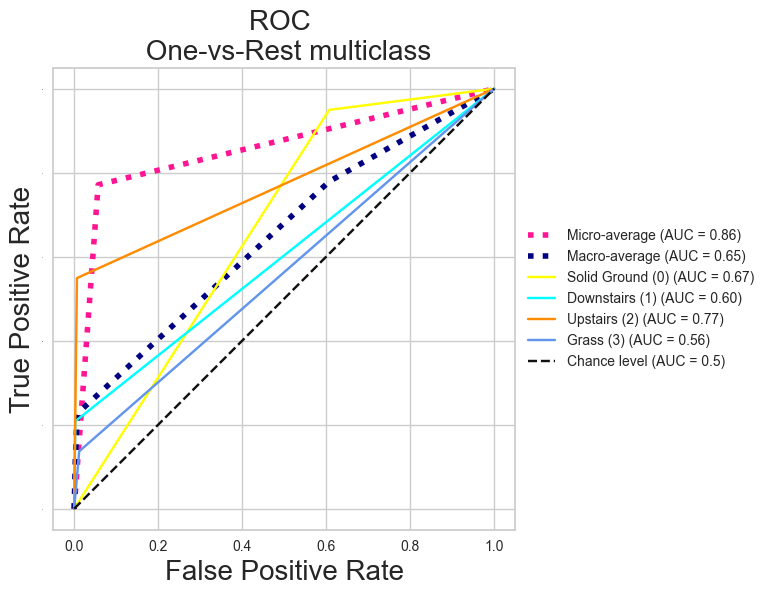

In [131]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"Micro-average (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"Macro-average (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)




colors = cycle(["yellow","aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(len(cls_name)), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"{cls_name[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC \n One-vs-Rest multiclass")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.rc('font', size=1)
#plt.rc('legend', fontsize=10)
          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.show()